In [25]:
import cv2
import numpy as np
import os, sys
import matplotlib.pyplot as plt
import pickle as pkl

In [56]:
p1 = cv2.imread('./bags/subh_1/frame98/f-plane.png')
p2 = cv2.imread('./bags/subh_1/frame99/f-plane.png')
gray_p1 = cv2.cvtColor(p1, cv2.COLOR_BGR2GRAY)
gray_p2 = cv2.cvtColor(p2, cv2.COLOR_BGR2GRAY)

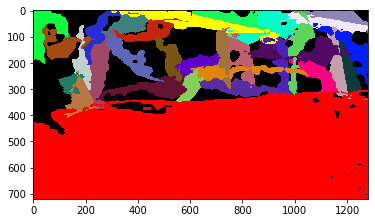

In [57]:
plt.imshow(p1)

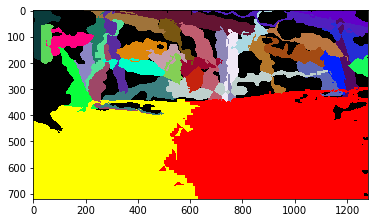

In [58]:
plt.imshow(p2)

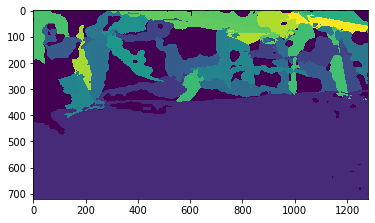

In [59]:
plt.imshow(gray_p1)

In [60]:
mask_list = pkl.load(open('./data_/depth_threshold.pkl','rb'))

In [61]:
len(mask_list)

27

In [62]:
mask_1 = mask_list[8]
mask_2 = mask_list[9]

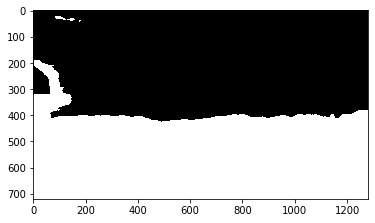

In [63]:
plt.imshow(mask_1*255)

In [65]:
thres_p1 = mask_1[:,:,0]*gray_p1
thres_p2 = mask_2[:,:,0]*gray_p2

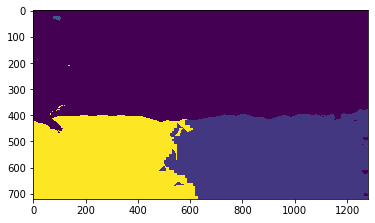

In [66]:
plt.imshow(thres_p2)

In [67]:
idx, counts = np.unique(thres_p1, return_counts=True)

In [110]:
idx, counts = np.unique(thres_p1, return_counts=True)
count_sort_ind = np.argsort(-counts)
idx = idx[count_sort_ind]
counts = counts[count_sort_ind]
idx, counts = list(idx), list(counts)
x = idx.index(0)
del idx[x]
del counts[x]
for ix, (a, b) in enumerate(zip(idx, counts)):
    print(a, ':', b)

29 : 399615
169 : 422
111 : 126
107 : 13


In [109]:
idx2, counts2 = np.unique(thres_p2, return_counts=True)
count2_sort_ind = np.argsort(-counts2)
idx2 = idx2[count2_sort_ind]
counts2 = counts2[count2_sort_ind]
idx2, counts2 = list(idx2), list(counts2)
x = idx2.index(0)
del idx2[x]
del counts2[x]
for ix, (a, b) in enumerate(zip(idx2, counts2)):
    print(a, ':', b)

29 : 227751
179 : 171787
54 : 449
169 : 65
164 : 1


In [117]:
def plane_smooth(prev_cnt, now_cnt, now_idx, now_image):
    if prev_cnt[0]-now_cnt[0] > prev_cnt[0]/10:
        now_image[now_image==now_idx[1]]=now_idx[0]
    return now_image

def non_max_suppress(image, idx):
    image[image!=idx]=0
    return image

In [118]:
new_p2 = plane_smooth(counts, counts2, idx2, thres_p2)
final_p2 = non_max_suppress(new_p2, idx2[0])

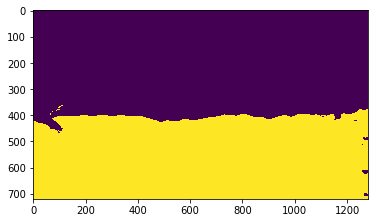

In [119]:
plt.imshow(new_p2)

In [120]:
idx, counts = np.unique(final_p2, return_counts=True)

In [121]:
idx

array([ 0, 29], dtype=uint8)